In [13]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import folium
from folium.plugins import MarkerCluster
from utilities import plot_air_quality_map, plot_region_level_map


### Wstępne EDA na danych oryginalnych

In [2]:
df = pd.read_excel("who_aap_2021_v9_11august2022.xlsx", sheet_name="AAP_2022_city_v9")
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "").str.replace("/", "_").str.lower()

C:\Users\Tymek\AppData\Local\Temp\ipykernel_21080\24607500.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "").str.replace("/", "_").str.lower()
C:\Users\Tymek\AppData\Local\Temp\ipykernel_21080\24607500.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "").str.replace("/", "_").str.lower()


C:\Users\Tymek\Documents\STUDIA\Magisterka\PUM\EDA_PM\utilities.py:39: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


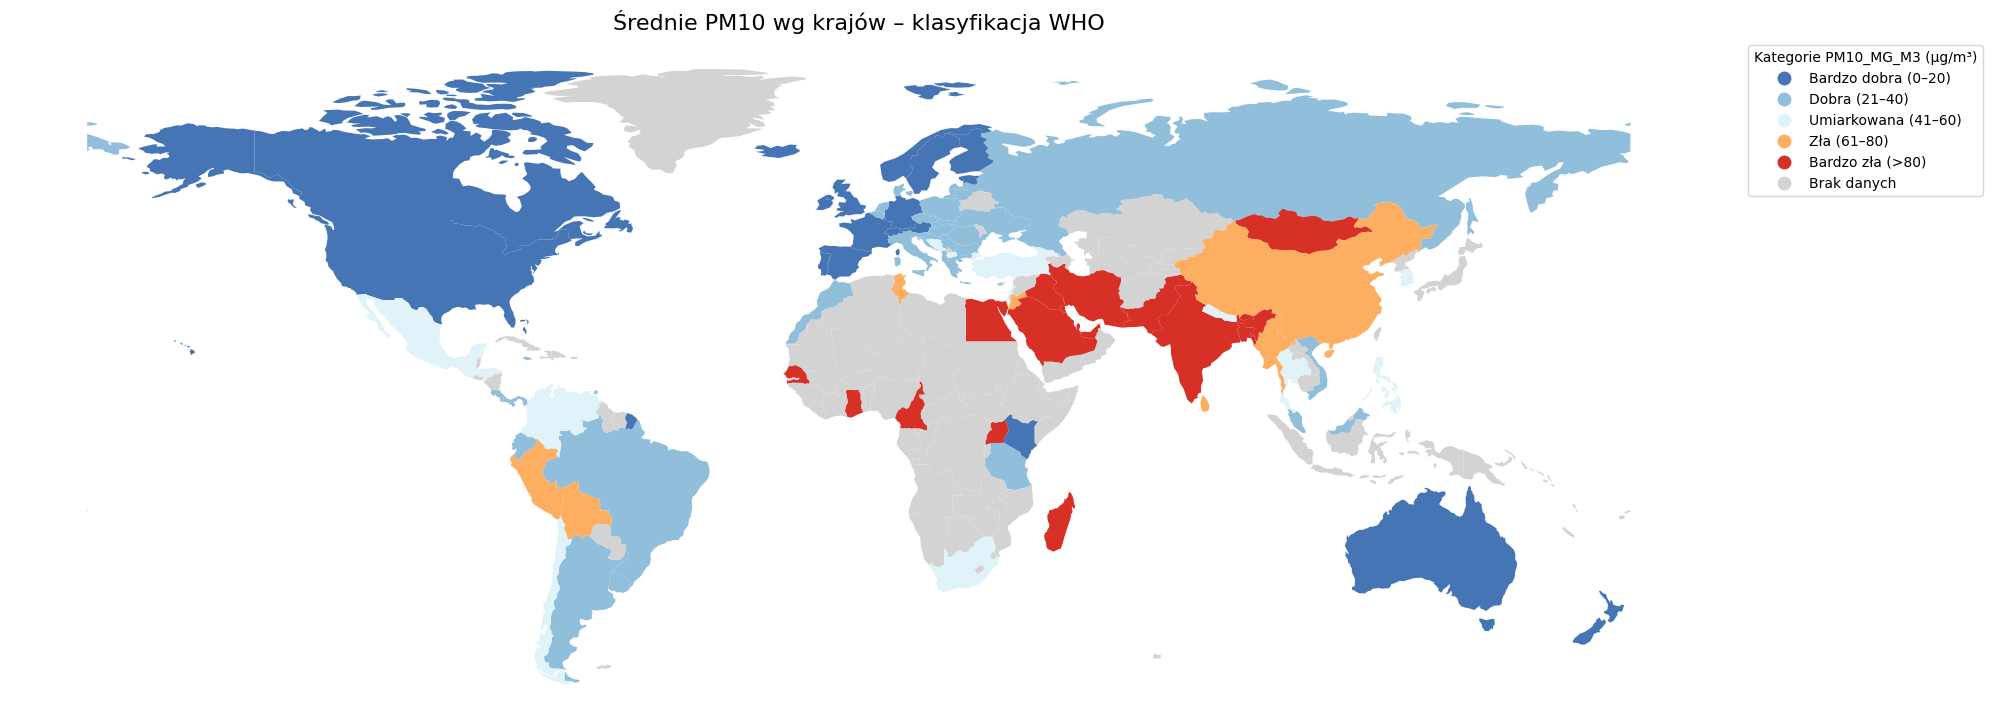

In [3]:
plot_air_quality_map(
    df=df,
    value_col="pm10_μg_m3",
    title="Średnie PM10 wg krajów – klasyfikacja WHO",
    filename="mapa_pm10.png",
    bins=[0, 20, 40, 60, 80, float("inf")],
    labels=[
        "Bardzo dobra (0–15)",
        "Dobra (16–40)",
        "Umiarkowana (41–60)",
        "Zła (61–80)",
        "Bardzo zła (>80)"
    ]
)

C:\Users\Tymek\Documents\STUDIA\Magisterka\PUM\EDA_PM\utilities.py:39: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


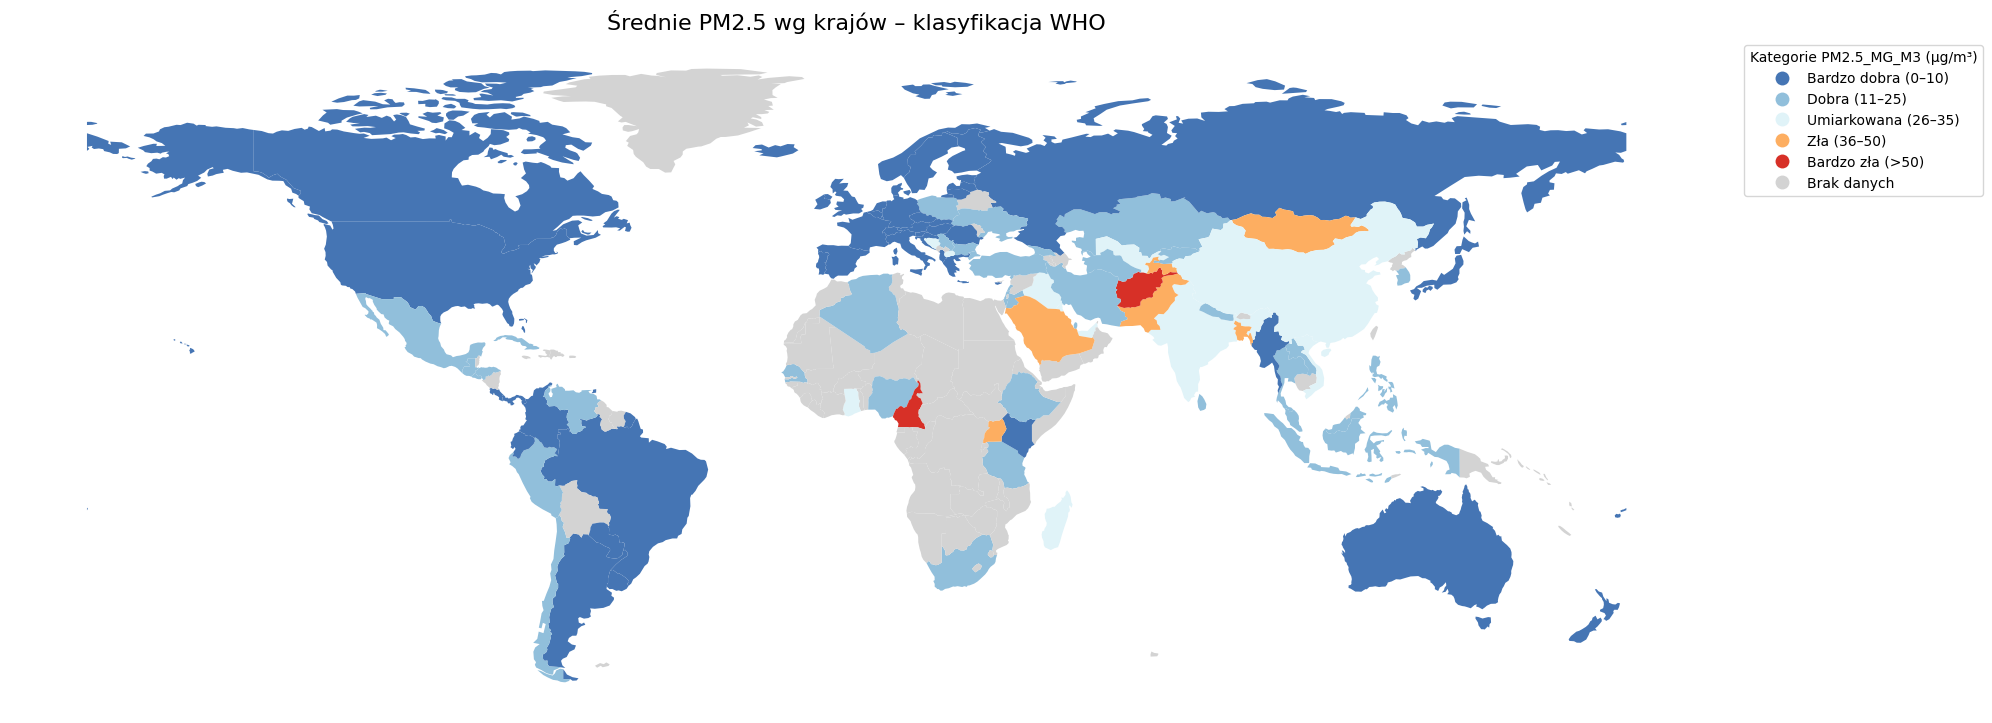

In [4]:
plot_air_quality_map(
    df=df,
    value_col="pm2.5_μg_m3",
    title="Średnie PM2.5 wg krajów – klasyfikacja WHO",
    filename="mapa_pm10.png",
    bins=[0, 20, 40, 60, 80, float("inf")],
    labels = [
            "Bardzo dobra (0–10)",
            "Dobra (11–25)",
            "Umiarkowana (26–35)",
            "Zła (36–50)",
            "Bardzo zła (>50)"
        ]
)

C:\Users\Tymek\Documents\STUDIA\Magisterka\PUM\EDA_PM\utilities.py:39: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


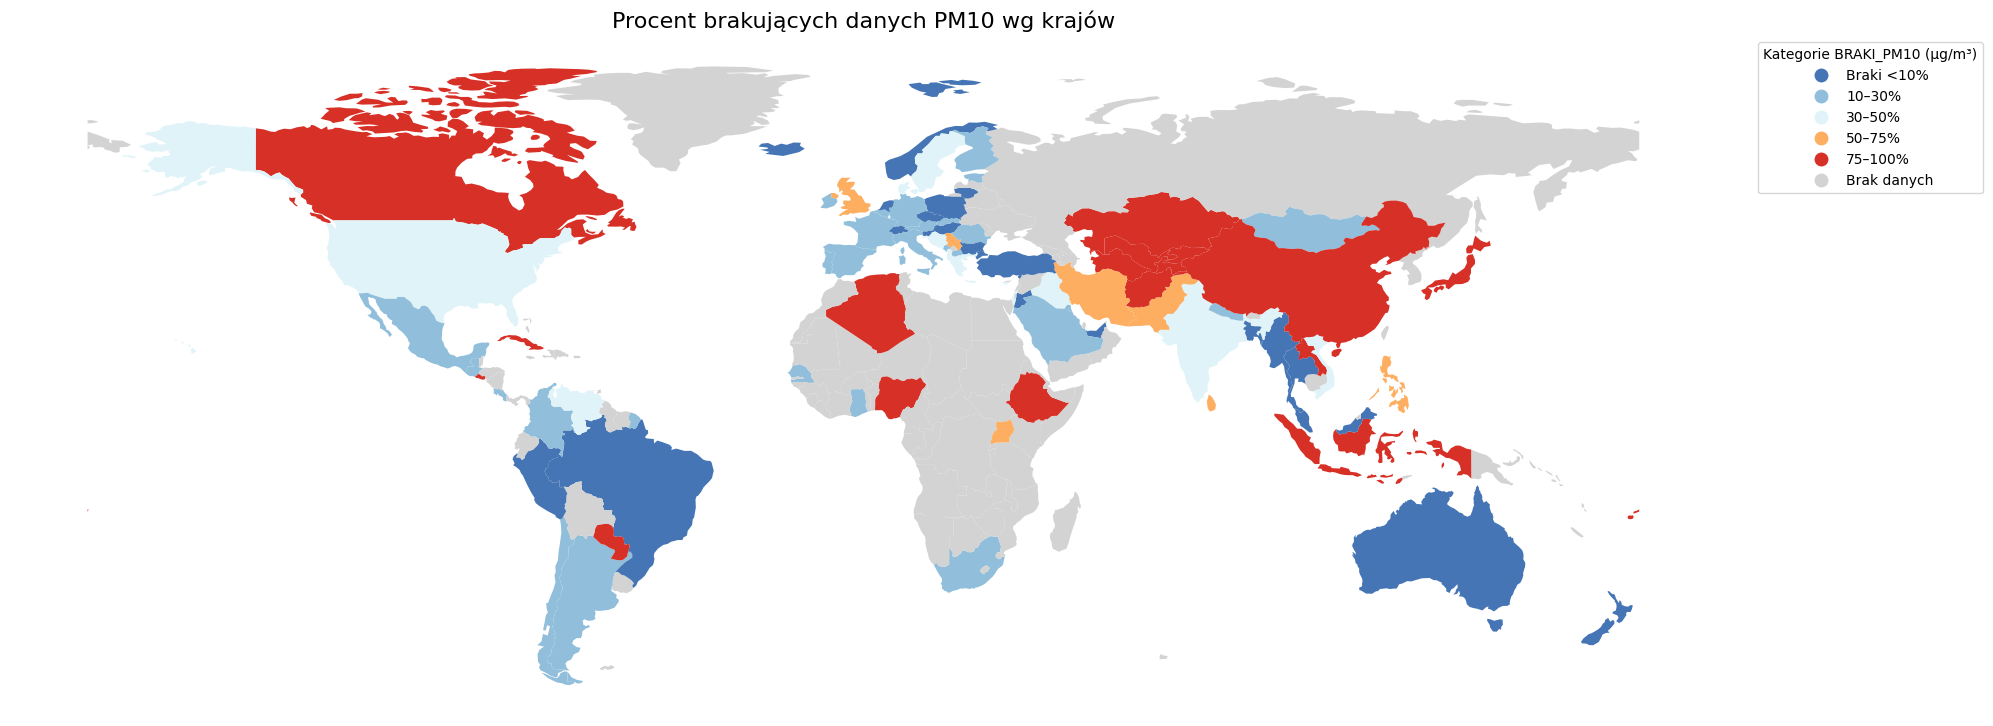

In [5]:
missing_pm10 = (
    df.groupby(["iso3", "who_country_name"])["pm10_μg_m3"]
    .apply(lambda x: x.isna().mean() * 100)
    .reset_index(name="braki_pm10")
)
plot_air_quality_map(
    df=missing_pm10,
    value_col="braki_pm10",
    title="Procent brakujących danych PM10 wg krajów",
    filename="braki_pm10.png",
    bins=[0, 10, 30, 50, 75, 100],
    labels=[
        "Braki <10%",
        "10–30%",
        "30–50%",
        "50–75%",
        "75–100%"
    ],
    cmap_colors=["#4575b4", "#91bfdb", "#e0f3f8", "#fdae61", "#d73027", "lightgrey"]
)


C:\Users\Tymek\Documents\STUDIA\Magisterka\PUM\EDA_PM\utilities.py:39: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


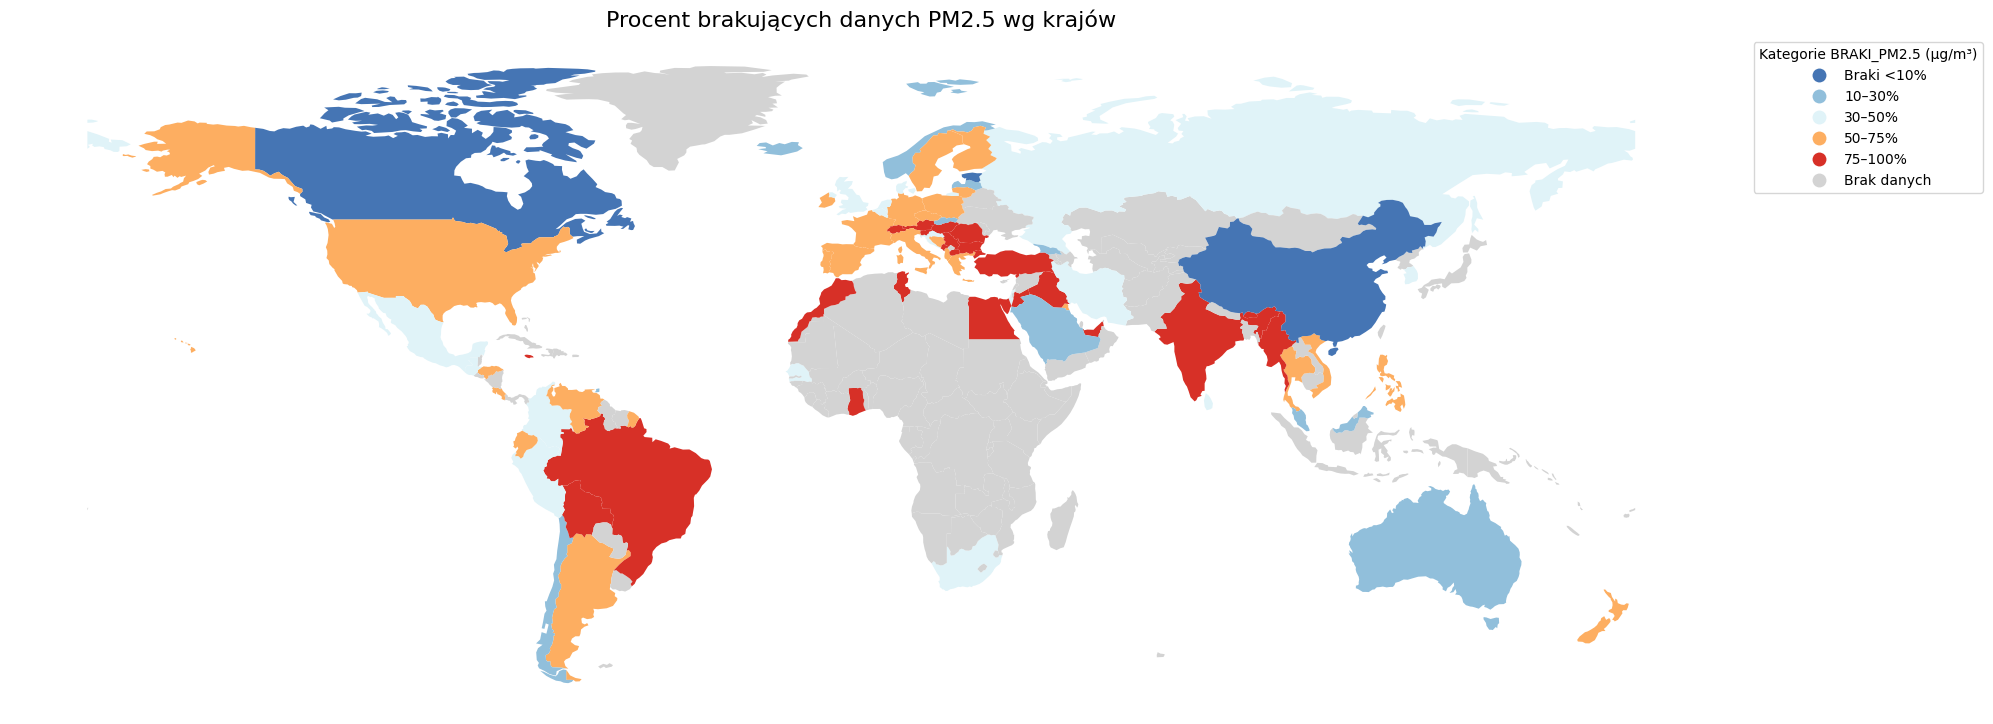

In [11]:
missing_pm25 = (
    df.groupby(["iso3", "who_country_name"])["pm2.5_μg_m3"]
    .apply(lambda x: x.isna().mean() * 100)
    .reset_index(name="braki_pm2.5")
)
plot_air_quality_map(
    df=missing_pm25,
    value_col="braki_pm2.5",
    title="Procent brakujących danych PM2.5 wg krajów",
    filename="braki_pm10.png",
    bins=[0, 10, 30, 50, 75, 100],
    labels=[
        "Braki <10%",
        "10–30%",
        "30–50%",
        "50–75%",
        "75–100%"
    ],
    cmap_colors=["#4575b4", "#91bfdb", "#e0f3f8", "#fdae61", "#d73027", "lightgrey"]
)

# Podział na Regiony WHO

C:\Users\Tymek\AppData\Local\Temp\ipykernel_21080\3225858082.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "").str.replace("/", "_").str.lower()
C:\Users\Tymek\AppData\Local\Temp\ipykernel_21080\3225858082.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "").str.replace("/", "_").str.lower()
C:\Users\Tymek\AppData\Local\Temp\ipykernel_21080\3225858082.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original '

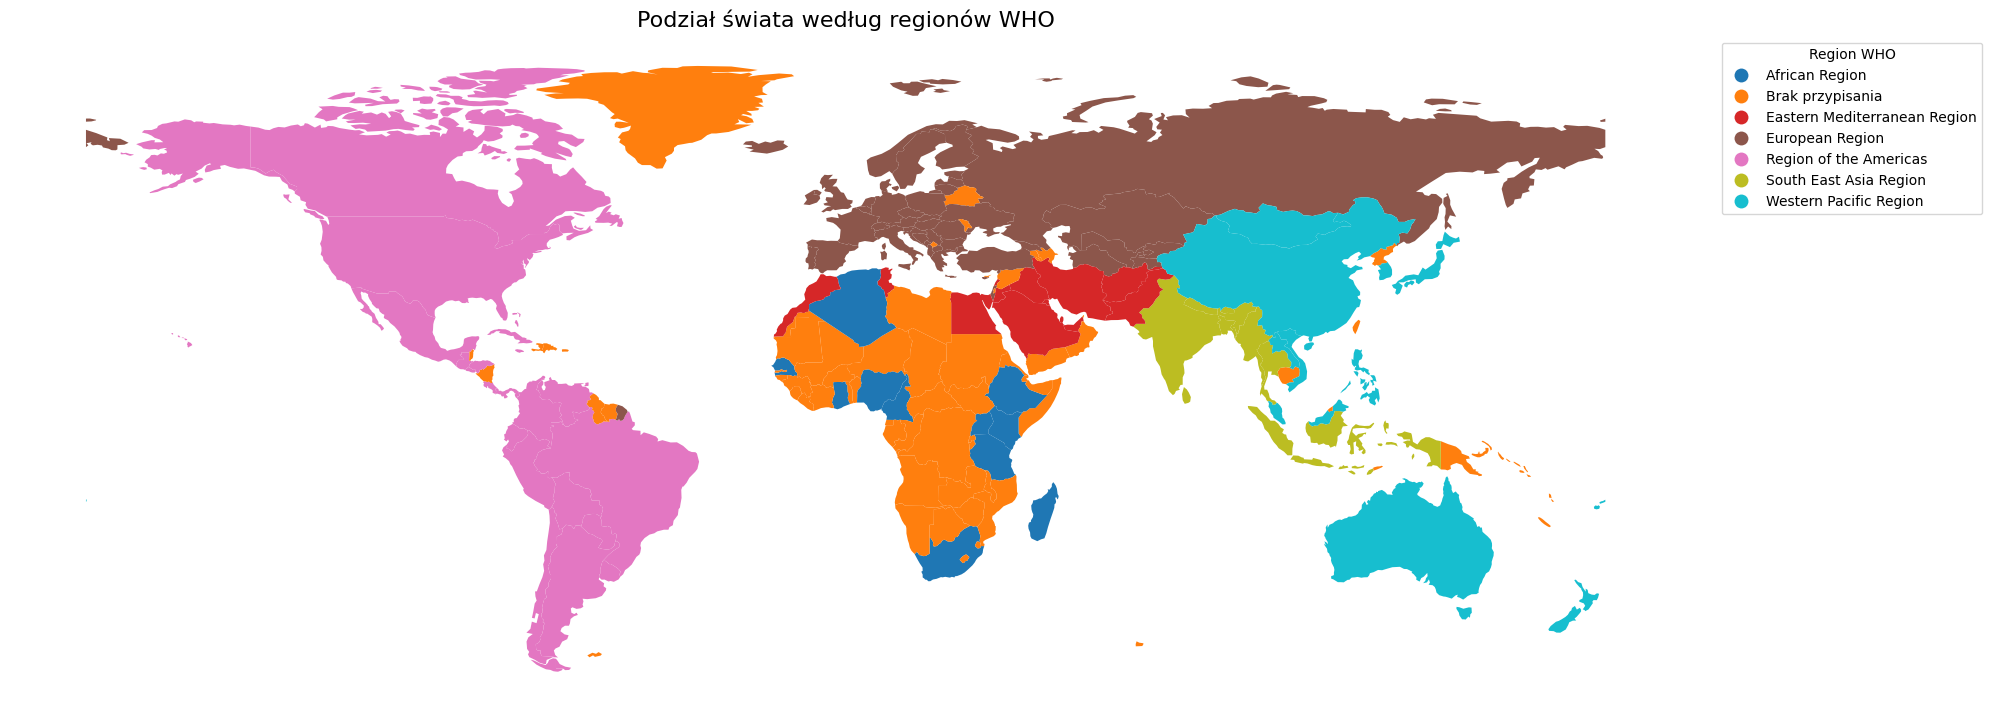

In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Wczytanie danych WHO
df = pd.read_excel("who_aap_2021_v9_11august2022.xlsx", sheet_name="AAP_2022_city_v9")
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "").str.replace("/", "_").str.lower()

# Mapa świata
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world[world["name"] != "Antarctica"]
world["geometry"] = world["geometry"].buffer(0)  # <-- naprawa geometrii

# Mapowanie ISO3 → Region WHO
country_region = df[["iso3", "who_region"]].drop_duplicates()
world = world.merge(country_region, how="left", left_on="iso_a3", right_on="iso3")
world["who_region"] = world["who_region"].fillna("Brak przypisania")

# Rysowanie
fig, ax = plt.subplots(figsize=(20, 10))
world.plot(column="who_region", ax=ax, cmap="tab10", legend=True,
           legend_kwds={"title": "Region WHO", "bbox_to_anchor": (1.02, 1), "loc": "upper left"})
ax.set_title("Podział świata według regionów WHO", fontsize=16)
ax.axis("off")
plt.tight_layout()
plt.savefig("mapa_regiony_who.png")
plt.show()


C:\Users\Tymek\Documents\STUDIA\Magisterka\PUM\EDA_PM\utilities.py:89: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


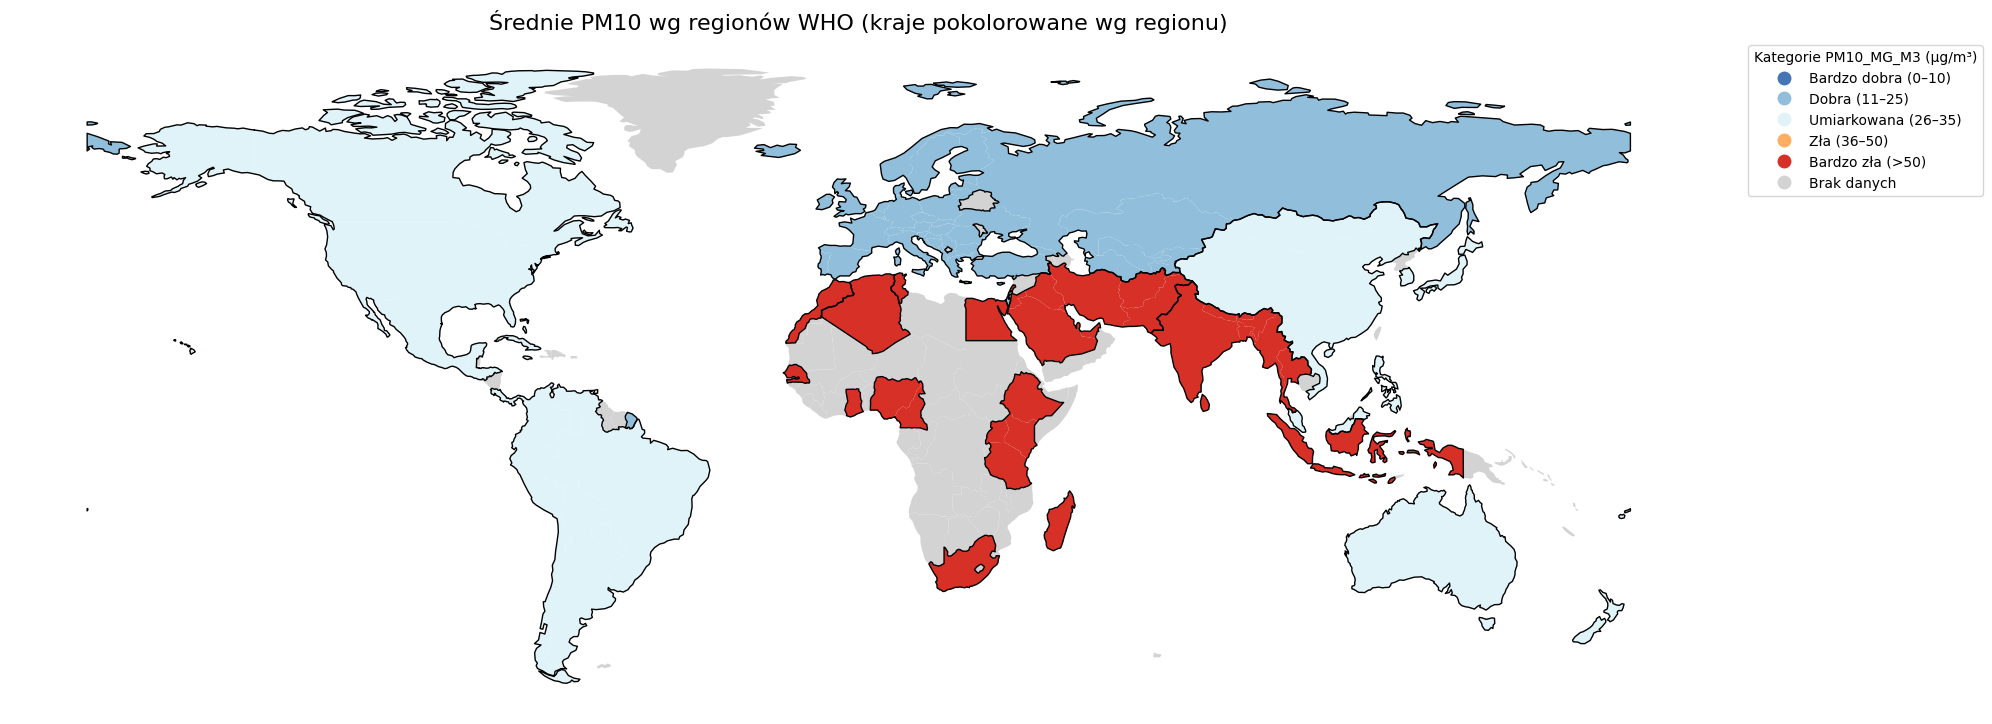

In [9]:
from utilities import plot_region_level_map
plot_region_level_map(
    df=df,
    value_col="pm10_μg_m3",
    title="Średnie PM10 wg regionów WHO (kraje pokolorowane wg regionu)",
    filename="mapa_pm25_regiony.png"
)

C:\Users\Tymek\Documents\STUDIA\Magisterka\PUM\EDA_PM\utilities.py:89: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


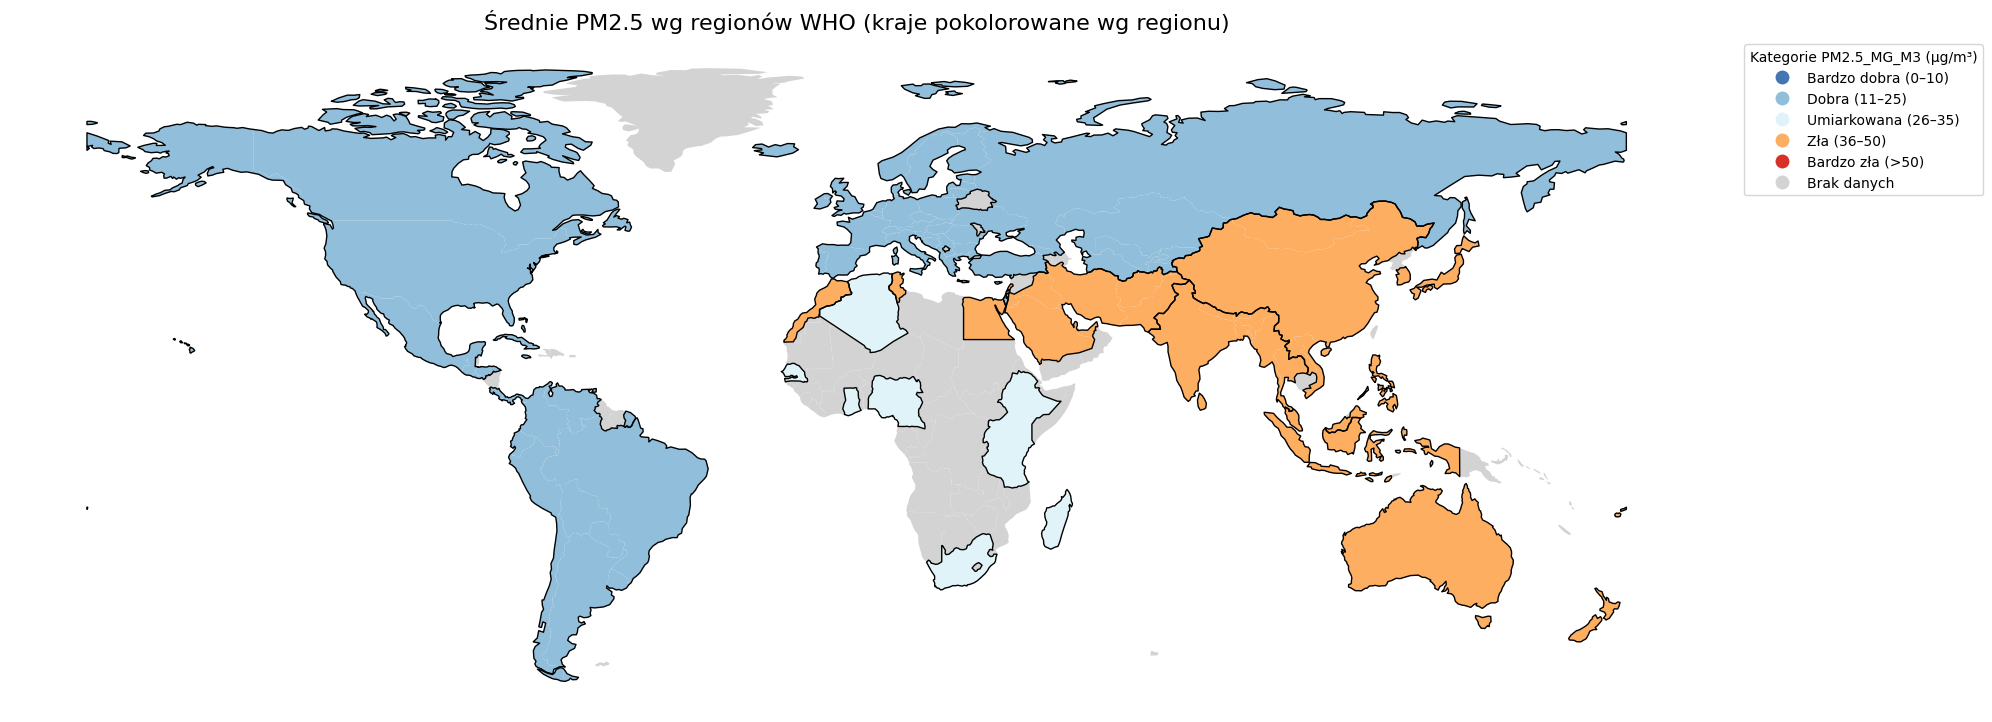

In [7]:
plot_region_level_map(
    df=df,
    value_col="pm2.5_μg_m3",
    title="Średnie PM2.5 wg regionów WHO (kraje pokolorowane wg regionu)",
    filename="mapa_pm25_regiony.png"
)